# <center> Adult Dataset - EDA Part</center>

### INDEX
<ul>
<li><a href="#EDA">EDA</a></li>
</ul>

In [67]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

<a id="Cleaning"> </a>
## EDA
in this step we clean the dataset from nulls,duplicates , outliers and make the dataset ready for the visulaization

In [68]:
df=pd.read_csv('Adults_salaries_cleaned.csv')
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
45170   27       Private  257302    Assoc-acdm               12   
45171   40       Private  154374       HS-grad                9   
45172   58       Private  151910       HS-grad                9   
45173   22       Private  201490       HS-grad                9   
45174   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male   
2      Married-civ-spouse    Protective-serv        Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4           Never-married      Other-service  Not-in-family  White    Male   
...                   ...                ...            ...    ...     ...   
45170  Married-civ-spouse       Tech-support           Wife  White  Female   
45171  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
45172             Widowed       Adm-clerical      Unmarried  White  Female   
45173       Never-married       Adm-clerical      Own-child  White    Male   
45174  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
45170             0             0              38  United-States  <=50K  
45171             0             0              40  United-States   >50K  
45172             0             0              40  United-States  <=50K  
45173             0             0              20  United-States  <=50K  
45174         15024             0              40  United-States   >50K  

[45175 rows x 15 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


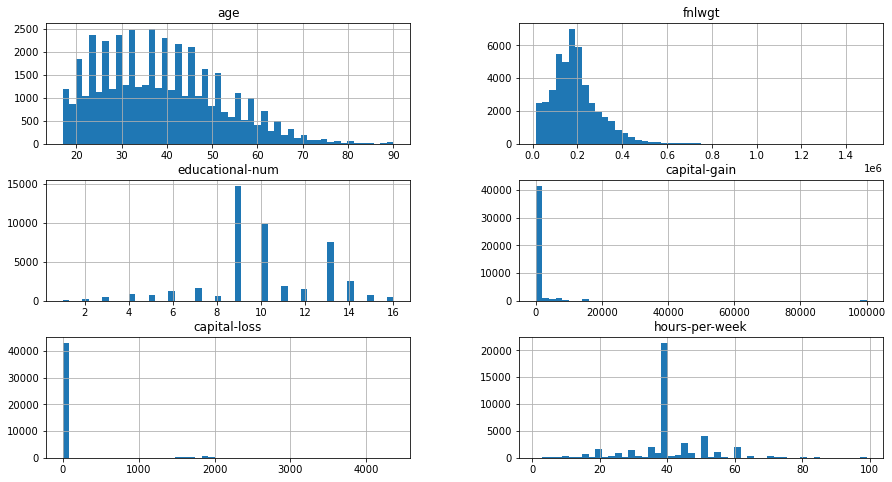

In [70]:
df.hist(figsize=(15, 8),bins = 50)
plt.show()

In [71]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [72]:
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed']:
        return 'single'
    else:
        return 'divorced'
df['marital-status'] = df['marital-status'].apply(convert_marital_status)


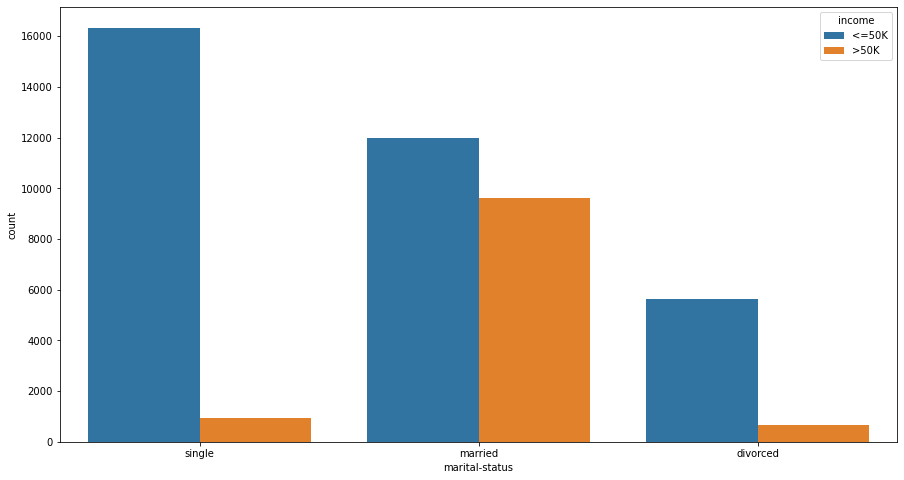

In [73]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='marital-status', hue='income')
plt.show()

In [74]:
fig = px.histogram(df, x='marital-status', color='income',title='how marital status influence income')
fig.show()

In [75]:
gender_counts=df.gender.value_counts()
gender_counts=gender_counts.reset_index().rename(columns={'index': 'gender', 'gender': 'counts'})
gender_counts

gender  counts
0    Male   30495
1  Female   14680

In [76]:
fig2 = px.pie(gender_counts, values='counts', names='gender', title='gender')
fig2.show()

In [77]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

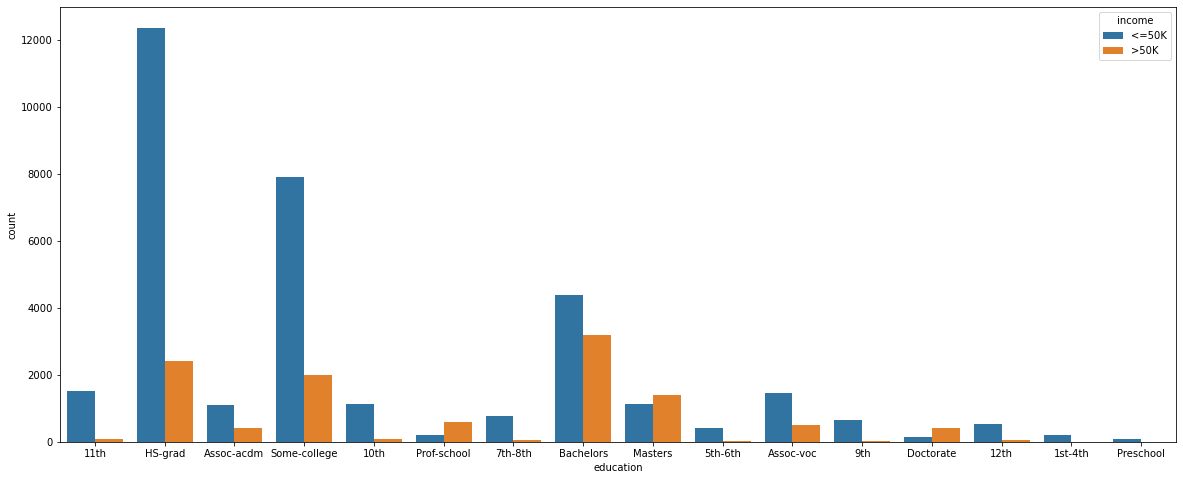

In [78]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='education', hue='income')
plt.show()

In [79]:
race_counts=df.race.value_counts()
race_counts

White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [80]:
race_counts=race_counts.reset_index().rename(columns={'index': 'race', 'race': 'counts'})
race_counts

race  counts
0               White   38859
1               Black    4227
2  Asian-Pac-Islander    1301
3  Amer-Indian-Eskimo     435
4               Other     353

In [81]:
fig1 = px.pie(race_counts, values='counts', names='race', title='race')
fig1.show()

### LET SEE AVERAGE HOURS PER WEEK FOR EACH GENDER 

In [82]:
df.groupby('gender')['hours-per-week'].mean()

gender
Female    36.937943
Male      42.870274
Name: hours-per-week, dtype: float64

In [83]:
gender_hours_counts=df.groupby('gender')['hours-per-week'].mean().reset_index()
gender_hours_counts

gender  hours-per-week
0  Female       36.937943
1    Male       42.870274

### BUT IF WE WANNA EXPRESS ABOUT THE COUNT OF PEOPLE SPENT HOURS IN WEEK  , WE REPRENT IT LIKE THIS

In [84]:
fig=px.histogram(df,x='hours-per-week',color='income',title='how hours of week influences income')
fig.show()

In [85]:
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [86]:
fig = px.histogram(df, x='workclass', color='income',title='how work class influence income')
fig.show()

In [87]:
fig = px.histogram(df, x='native-country', color='income',title='income through countries')
fig.show()

In [88]:
fig = px.histogram(df, x='occupation', color='income',title='how occupation influence income')
fig.show()

In [89]:
income_counts=df.income.value_counts()
income_counts=income_counts.reset_index().rename(columns={'index': 'income', 'income': 'counts'})
income_counts

income  counts
0  <=50K   33973
1   >50K   11202

In [90]:
fig1 = px.pie(income_counts, values='counts', names='income', title='income')
fig1.show()

In [91]:
fig_edu=px.histogram(df,x='education',color='income',facet_col='gender',title='how education influences income')
fig_edu.show()

In [92]:
from dash import Dash,html,dcc,callback
from dash.dependencies import Input,Output,State
app=Dash()

app.layout=html.Div([
    html.H1('Salaries Data Analytics',style={'text-align':'center'}),
    dcc.Dropdown(id='education',options=df['education'].unique(),value='Bachelors',style={'width': '48%','align': 'right', 'display': 'inline-block'}),
    dcc.Graph(id='fig_edu',figure=fig,style={'width': '48%','align': 'left', 'display': 'inline-block'}),
    dcc.Graph(id='output')
])




@callback(
    Output('output','figure'),
    Input('education','value'),
)
def update_fig(v1):
    filtered_df=df[df['education']==v1]
    return (px.histogram(filtered_df,x='education',color='income',facet_col='gender'))

app.run(jupyter_mode='external')

Dash app running on http://127.0.0.1:8050/


<Figure size 360x144 with 0 Axes>

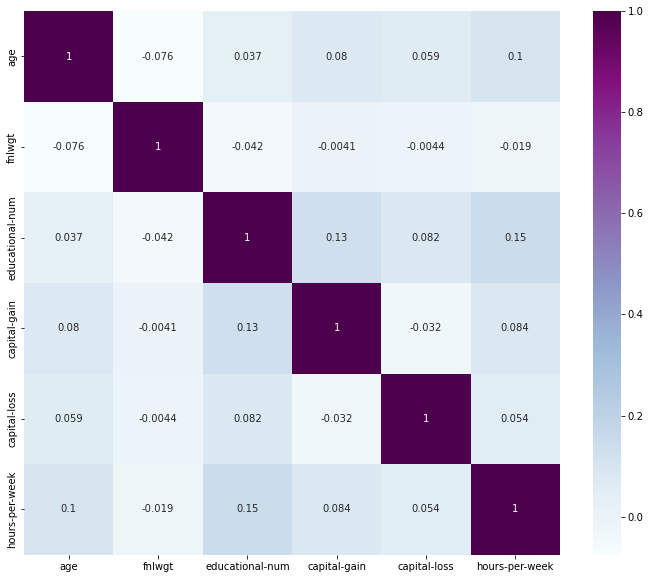

In [93]:
plt.figure(figsize=(5, 2))
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,cmap='BuPu',annot=True)
plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [95]:
df.to_csv('Adults_salaries_EDA.csv',index=False, index_label=None)